 # FOREST CARBON ANALYSIS 

#### This project analyzes the world's forest carbon metrics to develop data-driven solution to the world's climate change problem.
Dataset was obtained from Global Forest Watch.

IMPORT LIBRARIES

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import plotly.express as px

READ DATA FROM EXCEL FILE

In [2]:
climate_df = pd.read_excel("Country carbon data.xlsx")
climate_df

,country,umd_tree_cover_density_2000__threshold,umd_tree_cover_extent_2000__ha,gfw_aboveground_carbon_stocks_2000__Mg_C,avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1,gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1,gfw_forest_carbon_gross_removals__Mg_CO2_yr-1,gfw_forest_carbon_net_flux__Mg_CO2e_yr-1,gfw_forest_carbon_gross_emissions_2001__Mg_CO2e,gfw_forest_carbon_gross_emissions_2002__Mg_CO2e,...,gfw_forest_carbon_gross_emissions_2013__Mg_CO2e,gfw_forest_carbon_gross_emissions_2014__Mg_CO2e,gfw_forest_carbon_gross_emissions_2015__Mg_CO2e,gfw_forest_carbon_gross_emissions_2016__Mg_CO2e,gfw_forest_carbon_gross_emissions_2017__Mg_CO2e,gfw_forest_carbon_gross_emissions_2018__Mg_CO2e,gfw_forest_carbon_gross_emissions_2019__Mg_CO2e,gfw_forest_carbon_gross_emissions_2020__Mg_CO2e,gfw_forest_carbon_gross_emissions_2021__Mg_CO2e,gfw_forest_carbon_gross_emissions_2022__Mg_CO2e
0,Afghanistan,30,205791,12410476,60,16684,432080,-415395,23243,39291,...,295,705,0,0,0,5349,3982,15023,8975,2437
1,Afghanistan,50,148430,9766233,66,13750,309352,-295602,21247,30838,...,186,464,0,0,0,4365,3620,13703,8064,2190
2,Afghanistan,75,75486,5572051,74,6664,169317,-162653,13135,14581,...,46,125,0,0,0,2260,1894,8949,3862,922
3,Akrotiri and Dhekelia,30,456,20529,45,618,1592,-974,383,144,...,443,437,2779,2967,430,350,234,177,247,39
4,Akrotiri and Dhekelia,50,336,16116,48,579,1206,-626,345,144,...,429,397,2714,2951,383,277,234,45,203,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,Zambia,50,9185040,800000000,87,19808398,21019678,-1211280,9377327,9917324,...,14769942,18092027,15706200,25608834,26365831,23786539,21431788,27901928,38462692,34138905
698,Zambia,75,42886,4556982,106,1459697,3647621,-2187924,2010389,950044,...,494000,730411,483964,798970,1023116,938430,672076,1703392,5880310,5415252
699,Zimbabwe,30,1414326,71368674,50,4588450,5661787,-1073337,3106347,2830202,...,4570438,4340336,5963771,4980466,12496961,2965705,5414857,2923708,4242014,4293611
700,Zimbabwe,50,293242,27041267,92,3198315,1510025,1688290,2196105,1831810,...,3501389,3060246,4624985,3509997,9301285,1887849,3772366,1972882,2418323,2958438


CHECK DATA TYPES

In [3]:
climate_df.dtypes

country                                              object
umd_tree_cover_density_2000__threshold                int64
umd_tree_cover_extent_2000__ha                        int64
gfw_aboveground_carbon_stocks_2000__Mg_C              int64
avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1     int64
gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1       int64
gfw_forest_carbon_gross_removals__Mg_CO2_yr-1         int64
gfw_forest_carbon_net_flux__Mg_CO2e_yr-1              int64
gfw_forest_carbon_gross_emissions_2001__Mg_CO2e       int64
gfw_forest_carbon_gross_emissions_2002__Mg_CO2e       int64
gfw_forest_carbon_gross_emissions_2003__Mg_CO2e       int64
gfw_forest_carbon_gross_emissions_2004__Mg_CO2e       int64
gfw_forest_carbon_gross_emissions_2005__Mg_CO2e       int64
gfw_forest_carbon_gross_emissions_2006__Mg_CO2e       int64
gfw_forest_carbon_gross_emissions_2007__Mg_CO2e       int64
gfw_forest_carbon_gross_emissions_2008__Mg_CO2e       int64
gfw_forest_carbon_gross_emissions_2009__

CHECK COLUMNS

In [4]:
climate_df.columns  

Index(['country', 'umd_tree_cover_density_2000__threshold',
       'umd_tree_cover_extent_2000__ha',
       'gfw_aboveground_carbon_stocks_2000__Mg_C',
       'avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1',
       'gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1',
       'gfw_forest_carbon_gross_removals__Mg_CO2_yr-1',
       'gfw_forest_carbon_net_flux__Mg_CO2e_yr-1',
       'gfw_forest_carbon_gross_emissions_2001__Mg_CO2e',
       'gfw_forest_carbon_gross_emissions_2002__Mg_CO2e',
       'gfw_forest_carbon_gross_emissions_2003__Mg_CO2e',
       'gfw_forest_carbon_gross_emissions_2004__Mg_CO2e',
       'gfw_forest_carbon_gross_emissions_2005__Mg_CO2e',
       'gfw_forest_carbon_gross_emissions_2006__Mg_CO2e',
       'gfw_forest_carbon_gross_emissions_2007__Mg_CO2e',
       'gfw_forest_carbon_gross_emissions_2008__Mg_CO2e',
       'gfw_forest_carbon_gross_emissions_2009__Mg_CO2e',
       'gfw_forest_carbon_gross_emissions_2010__Mg_CO2e',
       'gfw_forest_carbon_gross_emissions_2

CHECK FOR NULL VALUES

In [5]:
climate_df.isnull().sum()

country                                              0
umd_tree_cover_density_2000__threshold               0
umd_tree_cover_extent_2000__ha                       0
gfw_aboveground_carbon_stocks_2000__Mg_C             0
avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1    0
gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1      0
gfw_forest_carbon_gross_removals__Mg_CO2_yr-1        0
gfw_forest_carbon_net_flux__Mg_CO2e_yr-1             0
gfw_forest_carbon_gross_emissions_2001__Mg_CO2e      0
gfw_forest_carbon_gross_emissions_2002__Mg_CO2e      0
gfw_forest_carbon_gross_emissions_2003__Mg_CO2e      0
gfw_forest_carbon_gross_emissions_2004__Mg_CO2e      0
gfw_forest_carbon_gross_emissions_2005__Mg_CO2e      0
gfw_forest_carbon_gross_emissions_2006__Mg_CO2e      0
gfw_forest_carbon_gross_emissions_2007__Mg_CO2e      0
gfw_forest_carbon_gross_emissions_2008__Mg_CO2e      0
gfw_forest_carbon_gross_emissions_2009__Mg_CO2e      0
gfw_forest_carbon_gross_emissions_2010__Mg_CO2e      0
gfw_forest

CHECK FOR ACTUAL NUMBER OF COUNTRIES IN DATASET

In [6]:
climate_df['country'].unique().shape

(234,)

ADD NEW COLUMN FOR TOTAL FOREST CARBON EMISSION BY EACH AREA FROM 2001 TO 2022

In [7]:
emission_columns = [f'gfw_forest_carbon_gross_emissions_{year}__Mg_CO2e' for year in range(2001, 2023)]
climate_df['total_carbon_emissions'] = climate_df[emission_columns].sum(axis=1)
climate_df

,country,umd_tree_cover_density_2000__threshold,umd_tree_cover_extent_2000__ha,gfw_aboveground_carbon_stocks_2000__Mg_C,avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1,gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1,gfw_forest_carbon_gross_removals__Mg_CO2_yr-1,gfw_forest_carbon_net_flux__Mg_CO2e_yr-1,gfw_forest_carbon_gross_emissions_2001__Mg_CO2e,gfw_forest_carbon_gross_emissions_2002__Mg_CO2e,...,gfw_forest_carbon_gross_emissions_2014__Mg_CO2e,gfw_forest_carbon_gross_emissions_2015__Mg_CO2e,gfw_forest_carbon_gross_emissions_2016__Mg_CO2e,gfw_forest_carbon_gross_emissions_2017__Mg_CO2e,gfw_forest_carbon_gross_emissions_2018__Mg_CO2e,gfw_forest_carbon_gross_emissions_2019__Mg_CO2e,gfw_forest_carbon_gross_emissions_2020__Mg_CO2e,gfw_forest_carbon_gross_emissions_2021__Mg_CO2e,gfw_forest_carbon_gross_emissions_2022__Mg_CO2e,total_carbon_emissions
0,Afghanistan,30,205791,12410476,60,16684,432080,-415395,23243,39291,...,705,0,0,0,5349,3982,15023,8975,2437,367055
1,Afghanistan,50,148430,9766233,66,13750,309352,-295602,21247,30838,...,464,0,0,0,4365,3620,13703,8064,2190,302508
2,Afghanistan,75,75486,5572051,74,6664,169317,-162653,13135,14581,...,125,0,0,0,2260,1894,8949,3862,922,146606
3,Akrotiri and Dhekelia,30,456,20529,45,618,1592,-974,383,144,...,437,2779,2967,430,350,234,177,247,39,13605
4,Akrotiri and Dhekelia,50,336,16116,48,579,1206,-626,345,144,...,397,2714,2951,383,277,234,45,203,39,12746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,Zambia,50,9185040,800000000,87,19808398,21019678,-1211280,9377327,9917324,...,18092027,15706200,25608834,26365831,23786539,21431788,27901928,38462692,34138905,435784751
698,Zambia,75,42886,4556982,106,1459697,3647621,-2187924,2010389,950044,...,730411,483964,798970,1023116,938430,672076,1703392,5880310,5415252,32113345
699,Zimbabwe,30,1414326,71368674,50,4588450,5661787,-1073337,3106347,2830202,...,4340336,5963771,4980466,12496961,2965705,5414857,2923708,4242014,4293611,100945906
700,Zimbabwe,50,293242,27041267,92,3198315,1510025,1688290,2196105,1831810,...,3060246,4624985,3509997,9301285,1887849,3772366,1972882,2418323,2958438,70362936


In [8]:
climate_df.describe()

,umd_tree_cover_density_2000__threshold,umd_tree_cover_extent_2000__ha,gfw_aboveground_carbon_stocks_2000__Mg_C,avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1,gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1,gfw_forest_carbon_gross_removals__Mg_CO2_yr-1,gfw_forest_carbon_net_flux__Mg_CO2e_yr-1,gfw_forest_carbon_gross_emissions_2001__Mg_CO2e,gfw_forest_carbon_gross_emissions_2002__Mg_CO2e,gfw_forest_carbon_gross_emissions_2003__Mg_CO2e,...,gfw_forest_carbon_gross_emissions_2014__Mg_CO2e,gfw_forest_carbon_gross_emissions_2015__Mg_CO2e,gfw_forest_carbon_gross_emissions_2016__Mg_CO2e,gfw_forest_carbon_gross_emissions_2017__Mg_CO2e,gfw_forest_carbon_gross_emissions_2018__Mg_CO2e,gfw_forest_carbon_gross_emissions_2019__Mg_CO2e,gfw_forest_carbon_gross_emissions_2020__Mg_CO2e,gfw_forest_carbon_gross_emissions_2021__Mg_CO2e,gfw_forest_carbon_gross_emissions_2022__Mg_CO2e,total_carbon_emissions
count,702.000000,7.020000e+02,7.020000e+02,702.000000,7.020000e+02,7.020000e+02,7.020000e+02,7.020000e+02,7.020000e+02,7.020000e+02,...,7.020000e+02,7.020000e+02,7.020000e+02,7.020000e+02,7.020000e+02,7.020000e+02,7.020000e+02,7.020000e+02,7.020000e+02,7.020000e+02
mean,51.666667,1.375033e+07,1.131481e+09,70.897436,3.352043e+07,5.794833e+07,-2.451596e+07,1.910620e+07,2.367371e+07,1.965836e+07,...,3.759556e+07,3.339239e+07,5.267636e+07,4.866995e+07,4.053527e+07,3.875081e+07,4.009797e+07,4.003558e+07,3.930755e+07,7.374539e+08
std,18.422061,5.864189e+07,4.568870e+09,36.868441,1.438889e+08,2.310181e+08,1.394232e+08,9.476930e+07,1.273669e+08,1.088082e+08,...,1.549694e+08,1.432073e+08,2.526684e+08,2.070953e+08,1.658899e+08,1.469366e+08,1.573742e+08,1.669129e+08,1.716200e+08,3.165988e+09
min,30.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,-9.000000e+00,-2.200000e+09,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,30.000000,5.237750e+03,2.573912e+05,49.000000,2.835500e+03,4.789350e+04,-1.100000e+07,2.658500e+03,1.214750e+03,7.487500e+02,...,5.467500e+02,3.475000e+01,1.070000e+02,3.850000e+02,2.680000e+02,2.647500e+02,3.307500e+02,7.355000e+02,7.752500e+02,6.237450e+04
50%,50.000000,4.700040e+05,3.414424e+07,69.000000,6.125515e+05,2.980520e+06,-6.127595e+05,3.858505e+05,2.809885e+05,2.600145e+05,...,4.554670e+05,3.191465e+05,5.656315e+05,6.058040e+05,5.607795e+05,4.079110e+05,6.424965e+05,5.672850e+05,5.661290e+05,1.347613e+07
75%,75.000000,5.261709e+06,3.997500e+08,95.000000,1.042646e+07,2.733785e+07,-5.818000e+03,5.516967e+06,5.989849e+06,4.209874e+06,...,1.026009e+07,8.421812e+06,1.368315e+07,1.575675e+07,1.482525e+07,1.526874e+07,1.433365e+07,1.260383e+07,1.372046e+07,2.293821e+08
max,75.000000,7.610000e+08,5.560000e+10,169.000000,1.640000e+09,2.770000e+09,3.970000e+08,1.180000e+09,1.610000e+09,1.480000e+09,...,1.470000e+09,1.320000e+09,3.270000e+09,2.660000e+09,1.850000e+09,1.610000e+09,1.900000e+09,2.010000e+09,2.230000e+09,3.615100e+10


TRANSPOSE DATAFRAME FOR ALTERNATE VIEW OF DATASET

In [9]:
climate_df2=climate_df.set_index('country').transpose()
climate_df2

country,Afghanistan,Afghanistan,Afghanistan,Akrotiri and Dhekelia,Akrotiri and Dhekelia,Akrotiri and Dhekelia,Albania,Albania,Albania,Algeria,...,Western Sahara,Yemen,Yemen,Yemen,Zambia,Zambia,Zambia,Zimbabwe,Zimbabwe,Zimbabwe
umd_tree_cover_density_2000__threshold,30,50,75,30,50,75,30,50,75,30,...,75,30,50,75,30,50,75,30,50,75
umd_tree_cover_extent_2000__ha,205791,148430,75486,456,336,185,648680,534848,363824,1223621,...,0,126,10,0,24050819,9185040,42886,1414326,293242,79971
gfw_aboveground_carbon_stocks_2000__Mg_C,12410476,9766233,5572051,20529,16116,9639,40971858,37251527,28770150,64837658,...,0,4799,592,33,1600000000,800000000,4556982,71368674,27041267,9507709
avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1,60,66,74,45,48,52,63,70,79,53,...,0,38,60,74,67,87,106,50,92,119
gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1,16684,13750,6664,618,579,396,710878,673261,568927,3010948,...,0,0,0,0,37791864,19808398,1459697,4588450,3198315,1564448
gfw_forest_carbon_gross_removals__Mg_CO2_yr-1,432080,309352,169317,1592,1206,743,5107003,4298551,3007949,4628792,...,0,27589,27404,27387,54680855,21019678,3647621,5661787,1510025,839189
gfw_forest_carbon_net_flux__Mg_CO2e_yr-1,-415395,-295602,-162653,-974,-626,-347,-4396125,-3625290,-2439022,-1617845,...,0,-27589,-27404,-27387,-17000000,-1211280,-2187924,-1073337,1688290,725260
gfw_forest_carbon_gross_emissions_2001__Mg_CO2e,23243,21247,13135,383,345,204,1367093,1310578,1100431,984310,...,0,0,0,0,12181090,9377327,2010389,3106347,2196105,849838
gfw_forest_carbon_gross_emissions_2002__Mg_CO2e,39291,30838,14581,144,144,98,338115,328542,293750,872032,...,0,0,0,0,16555137,9917324,950044,2830202,1831810,542547
gfw_forest_carbon_gross_emissions_2003__Mg_CO2e,48188,41134,21656,0,0,0,178669,168340,137329,1154237,...,0,0,0,0,15821622,10163159,1286204,2963166,2186401,674750


FIND ALL DETAILS OF A COUNTRY FROM TRANSPOSED DATAFRAME

In [10]:
climate_df2['Guatemala']

country,Guatemala,Guatemala,Guatemala
umd_tree_cover_density_2000__threshold,30,50,75
umd_tree_cover_extent_2000__ha,7693456,6951962,5756629
gfw_aboveground_carbon_stocks_2000__Mg_C,598000000,567000000,501000000
avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1,78,82,87
gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1,35272231,34422877,31051636
gfw_forest_carbon_gross_removals__Mg_CO2_yr-1,31288064,27457103,21319957
gfw_forest_carbon_net_flux__Mg_CO2e_yr-1,3984167,6965774,9731679
gfw_forest_carbon_gross_emissions_2001__Mg_CO2e,21310474,20742236,18849190
gfw_forest_carbon_gross_emissions_2002__Mg_CO2e,22823130,22386523,20609067
gfw_forest_carbon_gross_emissions_2003__Mg_CO2e,36339875,35139899,29882596


In [11]:
hh = climate_df.nlargest(30, 'avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1').reset_index().drop('index', axis = 1)
[hh['country'].unique()] 

[array(['French Guiana', 'Suriname', 'Papua New Guinea', 'Bhutan',
        'Brunei', 'Solomon Islands', 'Cameroon', 'Nepal', 'Guyana',
        'Palau', 'Central African Republic',
        'Democratic Republic of the Congo', 'Peru', 'Indonesia'],
       dtype=object)]

AREAS WITH HIGHEST TREE COVER EXTENT IN 2000

In [12]:
climate_df.nlargest(10, 'umd_tree_cover_extent_2000__ha').reset_index().drop('index', axis = 1)

,country,umd_tree_cover_density_2000__threshold,umd_tree_cover_extent_2000__ha,gfw_aboveground_carbon_stocks_2000__Mg_C,avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1,gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1,gfw_forest_carbon_gross_removals__Mg_CO2_yr-1,gfw_forest_carbon_net_flux__Mg_CO2e_yr-1,gfw_forest_carbon_gross_emissions_2001__Mg_CO2e,gfw_forest_carbon_gross_emissions_2002__Mg_CO2e,...,gfw_forest_carbon_gross_emissions_2014__Mg_CO2e,gfw_forest_carbon_gross_emissions_2015__Mg_CO2e,gfw_forest_carbon_gross_emissions_2016__Mg_CO2e,gfw_forest_carbon_gross_emissions_2017__Mg_CO2e,gfw_forest_carbon_gross_emissions_2018__Mg_CO2e,gfw_forest_carbon_gross_emissions_2019__Mg_CO2e,gfw_forest_carbon_gross_emissions_2020__Mg_CO2e,gfw_forest_carbon_gross_emissions_2021__Mg_CO2e,gfw_forest_carbon_gross_emissions_2022__Mg_CO2e,total_carbon_emissions
0,Russia,30,761000000,29000000000,38,611000000,2770000000,-2200000000,287000000,356000000,...,653000000,446000000,832000000,990000000,1120000000,610000000,835000000,902000000,737000000,13430000000
1,Russia,50,601000000,26100000000,43,535000000,2330000000,-1800000000,246000000,306000000,...,545000000,397000000,706000000,917000000,975000000,528000000,667000000,716000000,637000000,11758000000
2,Brazil,30,519000000,55600000000,107,1640000000,1790000000,-150000000,1180000000,1610000000,...,1470000000,1320000000,3270000000,2660000000,1850000000,1610000000,1900000000,2010000000,2230000000,36151000000
3,Brazil,50,476000000,54300000000,114,1560000000,1550000000,8123859,1150000000,1570000000,...,1360000000,1220000000,3120000000,2530000000,1750000000,1500000000,1780000000,1890000000,2090000000,34304000000
4,Brazil,75,429000000,52400000000,122,1420000000,1290000000,126000000,1060000000,1470000000,...,1190000000,1070000000,2880000000,2290000000,1570000000,1340000000,1580000000,1720000000,1900000000,31215000000
5,Canada,30,418000000,13200000000,32,863000000,1650000000,-780000000,419000000,841000000,...,1070000000,1200000000,873000000,1090000000,880000000,938000000,408000000,1080000000,960000000,18981000000
6,Russia,75,330000000,17400000000,53,383000000,1460000000,-1100000000,174000000,202000000,...,348000000,285000000,451000000,677000000,690000000,374000000,451000000,409000000,409000000,8425000000
7,Canada,50,324000000,11800000000,37,685000000,1470000000,-780000000,357000000,732000000,...,648000000,943000000,738000000,770000000,760000000,840000000,371000000,889000000,754000000,15067000000
8,United States,30,279000000,17200000000,62,820000000,1520000000,-700000000,624000000,670000000,...,790000000,787000000,962000000,1050000000,961000000,912000000,956000000,997000000,908000000,18039000000
9,United States,50,245000000,16300000000,66,790000000,1400000000,-600000000,611000000,645000000,...,758000000,746000000,923000000,996000000,919000000,859000000,913000000,953000000,859000000,17389000000


AREAS WITH HIGHEST FOREST CARBON NET FLUX PER YEAR (CARBON NET FLUX = CARBON EMISSIONS - CARBON REMOVALS)

In [13]:
climate_df.nlargest(10, 'gfw_forest_carbon_net_flux__Mg_CO2e_yr-1').reset_index().drop('index', axis = 1)

,country,umd_tree_cover_density_2000__threshold,umd_tree_cover_extent_2000__ha,gfw_aboveground_carbon_stocks_2000__Mg_C,avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1,gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1,gfw_forest_carbon_gross_removals__Mg_CO2_yr-1,gfw_forest_carbon_net_flux__Mg_CO2e_yr-1,gfw_forest_carbon_gross_emissions_2001__Mg_CO2e,gfw_forest_carbon_gross_emissions_2002__Mg_CO2e,...,gfw_forest_carbon_gross_emissions_2014__Mg_CO2e,gfw_forest_carbon_gross_emissions_2015__Mg_CO2e,gfw_forest_carbon_gross_emissions_2016__Mg_CO2e,gfw_forest_carbon_gross_emissions_2017__Mg_CO2e,gfw_forest_carbon_gross_emissions_2018__Mg_CO2e,gfw_forest_carbon_gross_emissions_2019__Mg_CO2e,gfw_forest_carbon_gross_emissions_2020__Mg_CO2e,gfw_forest_carbon_gross_emissions_2021__Mg_CO2e,gfw_forest_carbon_gross_emissions_2022__Mg_CO2e,total_carbon_emissions
0,Indonesia,75,141000000,19100000000,136,894000000,497000000,397000000,477000000,602000000,...,1250000000,1120000000,1590000000,713000000,657000000,625000000,515000000,452000000,479000000,19664000000
1,Indonesia,50,155000000,20000000000,129,950000000,582000000,368000000,490000000,624000000,...,1350000000,1230000000,1750000000,801000000,738000000,711000000,577000000,499000000,531000000,20911000000
2,Indonesia,30,161000000,20300000000,126,961000000,614000000,347000000,492000000,627000000,...,1370000000,1250000000,1780000000,822000000,757000000,733000000,591000000,510000000,543000000,21143000000
3,Malaysia,75,27249584,3530000000,129,225000000,94043896,131000000,127000000,137000000,...,357000000,244000000,292000000,243000000,212000000,186000000,121000000,125000000,114000000,4957000000
4,Malaysia,50,28977160,3650000000,126,233000000,103000000,130000000,132000000,143000000,...,373000000,255000000,309000000,255000000,224000000,197000000,130000000,134000000,121000000,5130000000
5,Malaysia,30,29430562,3680000000,125,235000000,106000000,129000000,133000000,143000000,...,376000000,257000000,313000000,257000000,226000000,199000000,131000000,136000000,122000000,5159000000
6,Brazil,75,429000000,52400000000,122,1420000000,1290000000,126000000,1060000000,1470000000,...,1190000000,1070000000,2880000000,2290000000,1570000000,1340000000,1580000000,1720000000,1900000000,31215000000
7,Laos,30,19129552,2070000000,108,102000000,38925777,62611064,19209984,28831867,...,120000000,144000000,197000000,175000000,148000000,183000000,183000000,163000000,168000000,2234000037
8,Laos,50,18125587,2000000000,110,97754346,36104720,61649627,18396565,27572285,...,115000000,138000000,188000000,167000000,141000000,174000000,176000000,157000000,161000000,2150101189
9,Laos,75,14500030,1690000000,117,77858151,26483404,51374747,15519572,22565107,...,87407219,108000000,146000000,126000000,106000000,130000000,137000000,122000000,125000000,1711639069


MEAN CARBON STOCKS METRICS FOR EACH THRESHOLD AREA

In [14]:
climate_df.groupby('umd_tree_cover_density_2000__threshold')[['avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1','gfw_aboveground_carbon_stocks_2000__Mg_C','umd_tree_cover_extent_2000__ha']].mean()

,avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1,gfw_aboveground_carbon_stocks_2000__Mg_C,umd_tree_cover_extent_2000__ha
umd_tree_cover_density_2000__threshold,,,
30,64.021368,1.254090e+09,1.706289e+07
50,69.931624,1.161821e+09,1.409686e+07
75,78.739316,9.785328e+08,1.009124e+07


MATRIX FOR CORRELATION OF FOREST CARBON METRICS

<Axes: >

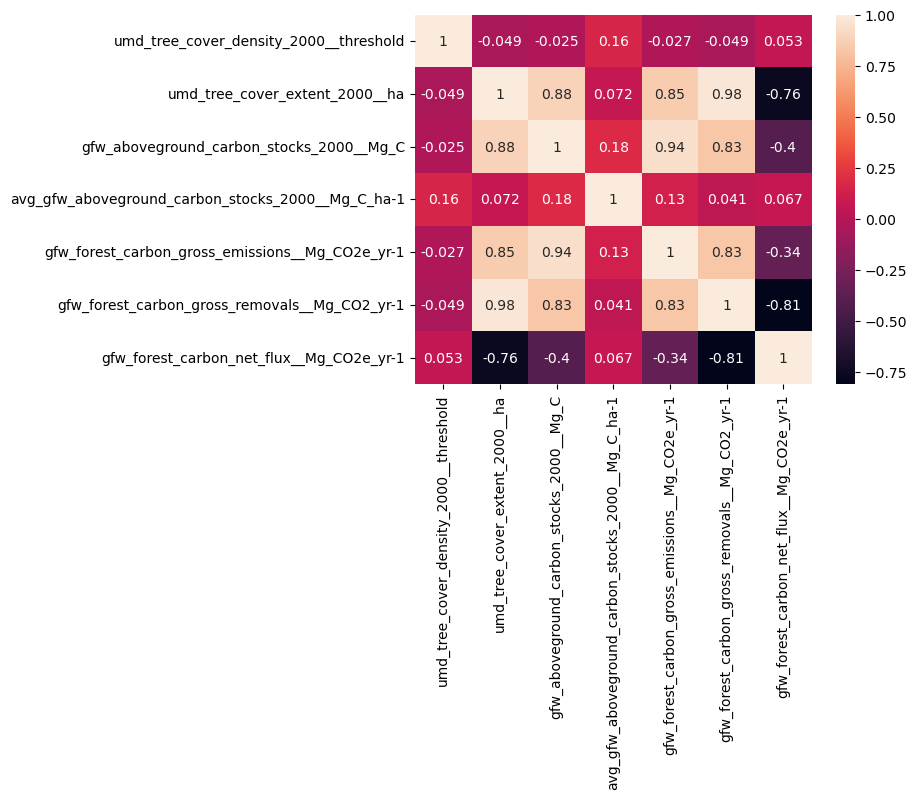

In [15]:
c_corr = climate_df.drop(climate_df.columns[8:31], axis=1)
c_corr = c_corr.drop('country', axis=1)
c_corr = c_corr.corr(method='pearson')
sns.heatmap( c_corr, annot=True)

COMPARING FOREST CARBON EMISSIONS AND REMOVALS BY TREE COVER EXTENT

<function matplotlib.pyplot.show(close=None, block=None)>

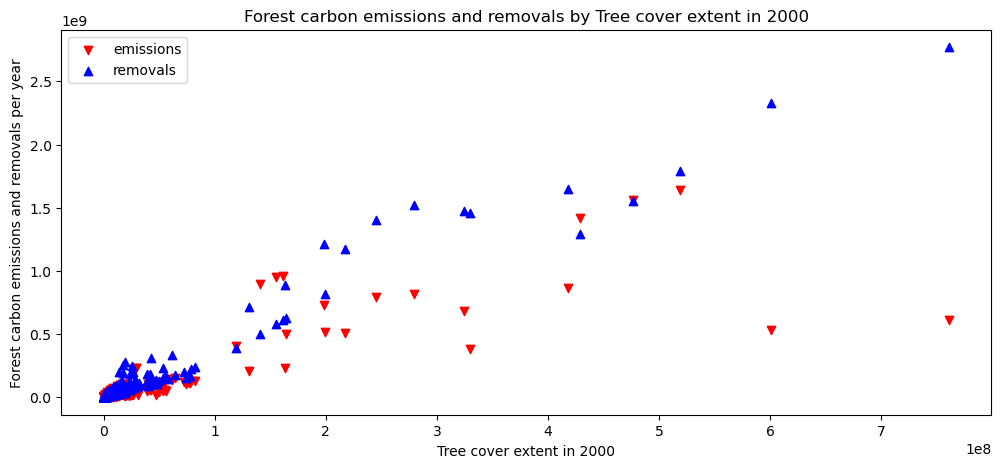

In [16]:
plt.figure(figsize=(12,5))
plt.scatter(climate_df['umd_tree_cover_extent_2000__ha'],climate_df['gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1'], color='r', label='emissions',marker='v')
plt.scatter(climate_df['umd_tree_cover_extent_2000__ha'],climate_df['gfw_forest_carbon_gross_removals__Mg_CO2_yr-1'], color='b',label='removals',marker='^')
plt.xlabel('Tree cover extent in 2000')
plt.ylabel('Forest carbon emissions and removals per year')
plt.title('Forest carbon emissions and removals by Tree cover extent in 2000')
plt.legend()
plt.show

FILTER AREAS WITH POSITIVE CARBON NET FLUX 

In [17]:
pos=climate_df[climate_df['gfw_forest_carbon_net_flux__Mg_CO2e_yr-1']>=0]
pos['country'].unique().shape
pos

,country,umd_tree_cover_density_2000__threshold,umd_tree_cover_extent_2000__ha,gfw_aboveground_carbon_stocks_2000__Mg_C,avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1,gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1,gfw_forest_carbon_gross_removals__Mg_CO2_yr-1,gfw_forest_carbon_net_flux__Mg_CO2e_yr-1,gfw_forest_carbon_gross_emissions_2001__Mg_CO2e,gfw_forest_carbon_gross_emissions_2002__Mg_CO2e,...,gfw_forest_carbon_gross_emissions_2014__Mg_CO2e,gfw_forest_carbon_gross_emissions_2015__Mg_CO2e,gfw_forest_carbon_gross_emissions_2016__Mg_CO2e,gfw_forest_carbon_gross_emissions_2017__Mg_CO2e,gfw_forest_carbon_gross_emissions_2018__Mg_CO2e,gfw_forest_carbon_gross_emissions_2019__Mg_CO2e,gfw_forest_carbon_gross_emissions_2020__Mg_CO2e,gfw_forest_carbon_gross_emissions_2021__Mg_CO2e,gfw_forest_carbon_gross_emissions_2022__Mg_CO2e,total_carbon_emissions
45,Bahrain,30,0,0,0,0,-9,9,0,0,...,0,0,0,0,0,0,0,0,0,0
46,Bahrain,50,0,0,0,0,-9,9,0,0,...,0,0,0,0,0,0,0,0,0,0
47,Bahrain,75,0,0,0,0,-9,9,0,0,...,0,0,0,0,0,0,0,0,0,0
60,Belize,30,1748276,155000000,89,5997673,4773976,1223697,3602474,6066796,...,7547321,5688257,10335426,7986006,5301557,8760474,13635463,4532568,4047563,131948813
61,Belize,50,1710654,154000000,90,5949374,4559270,1390104,3586618,6019528,...,7486162,5642530,10274151,7833269,5222585,8565047,13570513,4479558,3997641,130886223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,Western Sahara,30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
691,Western Sahara,50,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
692,Western Sahara,75,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
700,Zimbabwe,50,293242,27041267,92,3198315,1510025,1688290,2196105,1831810,...,3060246,4624985,3509997,9301285,1887849,3772366,1972882,2418323,2958438,70362936


FILTER AREA WITH NEGATIVE CARBON NET FLUX

In [18]:
neg = climate_df[(climate_df['gfw_forest_carbon_net_flux__Mg_CO2e_yr-1']<=0)]
neg['country'].unique().shape
neg

,country,umd_tree_cover_density_2000__threshold,umd_tree_cover_extent_2000__ha,gfw_aboveground_carbon_stocks_2000__Mg_C,avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1,gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1,gfw_forest_carbon_gross_removals__Mg_CO2_yr-1,gfw_forest_carbon_net_flux__Mg_CO2e_yr-1,gfw_forest_carbon_gross_emissions_2001__Mg_CO2e,gfw_forest_carbon_gross_emissions_2002__Mg_CO2e,...,gfw_forest_carbon_gross_emissions_2014__Mg_CO2e,gfw_forest_carbon_gross_emissions_2015__Mg_CO2e,gfw_forest_carbon_gross_emissions_2016__Mg_CO2e,gfw_forest_carbon_gross_emissions_2017__Mg_CO2e,gfw_forest_carbon_gross_emissions_2018__Mg_CO2e,gfw_forest_carbon_gross_emissions_2019__Mg_CO2e,gfw_forest_carbon_gross_emissions_2020__Mg_CO2e,gfw_forest_carbon_gross_emissions_2021__Mg_CO2e,gfw_forest_carbon_gross_emissions_2022__Mg_CO2e,total_carbon_emissions
0,Afghanistan,30,205791,12410476,60,16684,432080,-415395,23243,39291,...,705,0,0,0,5349,3982,15023,8975,2437,367055
1,Afghanistan,50,148430,9766233,66,13750,309352,-295602,21247,30838,...,464,0,0,0,4365,3620,13703,8064,2190,302508
2,Afghanistan,75,75486,5572051,74,6664,169317,-162653,13135,14581,...,125,0,0,0,2260,1894,8949,3862,922,146606
3,Akrotiri and Dhekelia,30,456,20529,45,618,1592,-974,383,144,...,437,2779,2967,430,350,234,177,247,39,13605
4,Akrotiri and Dhekelia,50,336,16116,48,579,1206,-626,345,144,...,397,2714,2951,383,277,234,45,203,39,12746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Yemen,75,0,33,74,0,27387,-27387,0,0,...,0,0,0,0,0,0,0,0,0,0
696,Zambia,30,24050819,1600000000,67,37791864,54680855,-17000000,12181090,16555137,...,41217524,31927632,51561706,57966459,51724125,45109707,59932138,78697183,69823213,831421002
697,Zambia,50,9185040,800000000,87,19808398,21019678,-1211280,9377327,9917324,...,18092027,15706200,25608834,26365831,23786539,21431788,27901928,38462692,34138905,435784751
698,Zambia,75,42886,4556982,106,1459697,3647621,-2187924,2010389,950044,...,730411,483964,798970,1023116,938430,672076,1703392,5880310,5415252,32113345


CORRELATION MATRIX TO INFER FACTORS INFLUENCING NEGATIVE NET FLUX

<Axes: >

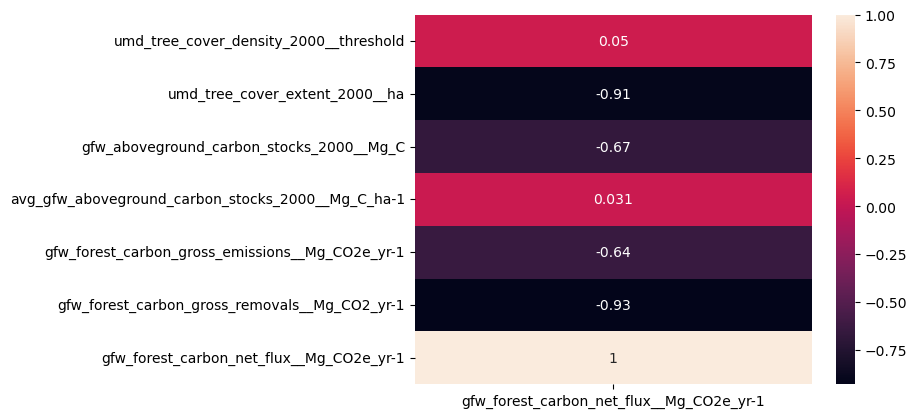

In [19]:
n_corr = neg.drop(climate_df.columns[8:31], axis=1)
n_corr = n_corr.drop('country', axis=1)
n_corr = n_corr.corr(method='pearson')
sns.heatmap( n_corr[['gfw_forest_carbon_net_flux__Mg_CO2e_yr-1']], annot=True)

CORRELATION MATRIX TO INFER FACTORS INFLUENCING POSITIVE NET FLUX

<Axes: >

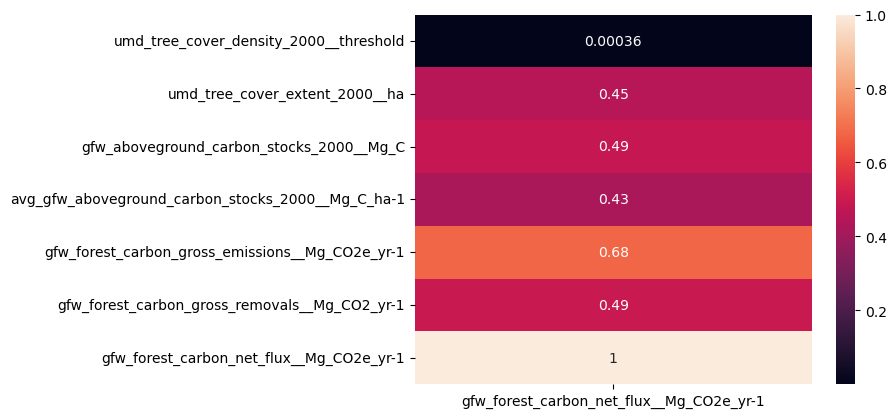

In [20]:
p_corr = pos.drop(climate_df.columns[8:31], axis=1)
p_corr = p_corr.drop('country', axis=1)
p_corr = p_corr.corr(method='pearson')
sns.heatmap( p_corr[['gfw_forest_carbon_net_flux__Mg_CO2e_yr-1']], annot=True)

CARBON EMISSIONS PER YEAR AND TREE COVER EXTENT SORTED BY TRESHOLD AREA FOR EACH COUNTRY

In [21]:
emisson_and_treecover_sortedby_treshold = climate_df.pivot_table(index= 'country',columns='umd_tree_cover_density_2000__threshold',values=['umd_tree_cover_extent_2000__ha','gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1'],aggfunc='sum',fill_value=0)
g = emisson_and_treecover_sortedby_treshold
g = g.rename(columns={
    30: 'thirty',
    50: 'fifty',
    75: 'seventyfive'
})
g=g.reset_index()
g

country  \
umd_tree_cover_density_2000__threshold                          
0                                                 Afghanistan   
1                                       Akrotiri and Dhekelia   
2                                                     Albania   
3                                                     Algeria   
4                                                     Andorra   
..                                                        ...   
229                                      Virgin Islands, U.S.   
230                                            Western Sahara   
231                                                     Yemen   
232                                                    Zambia   
233                                                  Zimbabwe   

                                       gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1  \
umd_tree_cover_density_2000__threshold                                          thirty   
0                                                                                16684   
1                                                                                  618   
2                                                                               710878   
3                                                                              3010948   
4                                                                                 3391   
..                                                                                 ...   
229                                                                              40171   
230                                                                                  0   
231                                                                                  0   
232                                                                           37791864   
233                                                                            4588450   

                                                              \
umd_tree_cover_density_2000__threshold     fifty seventyfive   
0                                          13750        6664   
1                                            579         396   
2                                         673261      568927   
3                                        2477717     1526289   
4                                           3254        2795   
..                                           ...         ...   
229                                        39872       38584   
230                                            0           0   
231                                            0           0   
232                                     19808398     1459697   
233                                      3198315     1564448   

                                       umd_tree_cover_extent_2000__ha  \
umd_tree_cover_density_2000__threshold                         thirty   
0                                                              205791   
1                                                                 456   
2                                                              648680   
3                                                             1223621   
4                                                               19004   
..                                                                ...   
229                                                             18998   
230                                                                 0   
231                                                               126   
232                                                          24050819   
233                                                           1414326   

                                                             
umd_tree_cover_density_2000__threshold    fifty seventyfive  
0                                        148430       75486  
1                                           336         185  
2     

ADD NEW COLUMNS FOR THRESHOLD TOTALS

In [22]:
g['gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1', 'total'] = g['gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1'].iloc[0:,0:].sum(axis=1)
g['umd_tree_cover_extent_2000__ha', 'total'] = g['umd_tree_cover_extent_2000__ha'].iloc[0:,0:].sum(axis=1)
g

country  \
umd_tree_cover_density_2000__threshold                          
0                                                 Afghanistan   
1                                       Akrotiri and Dhekelia   
2                                                     Albania   
3                                                     Algeria   
4                                                     Andorra   
..                                                        ...   
229                                      Virgin Islands, U.S.   
230                                            Western Sahara   
231                                                     Yemen   
232                                                    Zambia   
233                                                  Zimbabwe   

                                       gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1  \
umd_tree_cover_density_2000__threshold                                          thirty   
0                                                                                16684   
1                                                                                  618   
2                                                                               710878   
3                                                                              3010948   
4                                                                                 3391   
..                                                                                 ...   
229                                                                              40171   
230                                                                                  0   
231                                                                                  0   
232                                                                           37791864   
233                                                                            4588450   

                                                              \
umd_tree_cover_density_2000__threshold     fifty seventyfive   
0                                          13750        6664   
1                                            579         396   
2                                         673261      568927   
3                                        2477717     1526289   
4                                           3254        2795   
..                                           ...         ...   
229                                        39872       38584   
230                                            0           0   
231                                            0           0   
232                                     19808398     1459697   
233                                      3198315     1564448   

                                       umd_tree_cover_extent_2000__ha  \
umd_tree_cover_density_2000__threshold                         thirty   
0                                                              205791   
1                                                                 456   
2                                                              648680   
3                                                             1223621   
4                                                               19004   
..                                                                ...   
229                                                             18998   
230                                                                 0   
231                                                               126   
232                                                          24050819   
233                                                           1414326   

                                                             \
umd_tree_cover_density_2000__threshold    fifty seventyfive   
0                                        148430       75486   
1                                           336         185   
2 

MEAN OF GROSS CARBON EMISSION BY COUNTRY PER YEAR 

In [23]:
g['gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1', 'total'].mean()

100561288.6111111

MEAN OF TOTAL TREE COVER EXTENT BY COUNTRY

In [24]:
g['umd_tree_cover_extent_2000__ha', 'total'].mean()

41250996.940170944

COUNTRIES WITH ABOVE AVERAGE TOTAL GROSS CARBON EMISSIONS PER YEAR

In [25]:
countries_above_avg_emissions=g[g['gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1', 'total']>=100561288.6111111] 
countries_above_avg_emissions

country  \
umd_tree_cover_density_2000__threshold                                     
5                                                                 Angola   
8                                                              Argentina   
11                                                             Australia   
24                                                               Bolivia   
28                                                                Brazil   
34                                                              Cambodia   
35                                                              Cameroon   
36                                                                Canada   
42                                                                 Chile   
43                                                                 China   
45                                                              Colombia   
53                                                        CÃ´te d'Ivoire   
54                                      Democratic Republic of the Congo   
69                                                               Finland   
83                                                             Guatemala   
93                                                                 India   
94                                                             Indonesia   
111                                                                 Laos   
115                                                              Liberia   
122                                                           Madagascar   
124                                                             Malaysia   
132                                                               Mexico   
140                                                           Mozambique   
141                                                              Myanmar   
147                                                          New Zealand   
148                                                            Nicaragua   
160                                                     Papua New Guinea   
162                                                             Paraguay   
163                                                                 Peru   
164                                                          Philippines   
172                                                               Russia   
191                                                         South Africa   
201                                                               Sweden   
208                                                             Thailand   
221                                                        United States   
227                                                            Venezuela   
228                                                              Vietnam   

                                       gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1  \
umd_tree_cover_density_2000__threshold                                          thirty   
5                                                                             57315028   
8                                                                             71372263   
11                                                                           104000000   
24                                                                           150000000   
28                                                                          1640000000   
34                                                                            71536283   
35                                                                            49715603   
36                                                                           863000000   
42                                                                            39032292   
43                                                                           230000000   
45                  

COUNTRIES WITH BELOW AVERAGE TREE COVER EXTENT AND ABOVE AVERAGE TOTAL GROSS CARBON EMISSIONS PER YEAR

In [26]:
and_low_tree_cover_extent=countries_above_avg_emissions[countries_above_avg_emissions['umd_tree_cover_extent_2000__ha', 'total']<=41250996.940170944]
and_low_tree_cover_extent

country  \
umd_tree_cover_density_2000__threshold                   
34                                            Cambodia   
53                                      CÃ´te d'Ivoire   
83                                           Guatemala   
115                                            Liberia   
122                                         Madagascar   
140                                         Mozambique   
147                                        New Zealand   
148                                          Nicaragua   
191                                       South Africa   

                                       gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1  \
umd_tree_cover_density_2000__threshold                                          thirty   
34                                                                            71536283   
53                                                                            84506243   
83                                                                            35272231   
115                                                                           56646213   
122                                                                          104000000   
140                                                                           64852734   
147                                                                           38856411   
148                                                                           42293078   
191                                                                           45644681   

                                                              \
umd_tree_cover_density_2000__threshold     fifty seventyfive   
34                                      65987761    54201796   
53                                      51622375     7482428   
83                                      34422877    31051636   
115                                     54341263    10827383   
122                                     90730255    45043487   
140                                     37391784     2955751   
147                                     38483984    37174700   
148                                     41847500    40326216   
191                                     39745530    24066950   

                                       umd_tree_cover_extent_2000__ha  \
umd_tree_cover_density_2000__threshold                         thirty   
34                                                            8809930   
53                                                           14872640   
83                                                            7693456   
115                                                           9384713   
122                                                          17141086   
140                                                          28917947   
147                                                          11255743   
148                                                           7776808   
191                                                           5983115   

                                                              \
umd_tree_cover_density_2000__threshold     fifty seventyfive   
34                                       7482328     5842450   
53                                       6357505      511083   
83                                       6951962     5756629   
115                                      9055167     3611671   
122                                     12241380     5863678   
140                                     10493860      341593   
147                                     10796210     9368301   
148                                      7067163     5828862   
191                                      3163002     1082119   

                                       gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1  \
umd_tree_cover_density_2000__threshold                                           total   
34                     

LOCATE COUNTRY

In [27]:
#g[g['country']=='Russia']
g[g['country'].str.contains('Japan')]

country  \
umd_tree_cover_density_2000__threshold           
102                                      Japan   

                                       gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1  \
umd_tree_cover_density_2000__threshold                                          thirty   
102                                                                           18471998   

                                                              \
umd_tree_cover_density_2000__threshold     fifty seventyfive   
102                                     18365401    17611080   

                                       umd_tree_cover_extent_2000__ha  \
umd_tree_cover_density_2000__threshold                         thirty   
102                                                          26387254   

                                                              \
umd_tree_cover_density_2000__threshold     fifty seventyfive   
102                                     25597514    23385517   

                                       gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1  \
umd_tree_cover_density_2000__threshold                                           total   
102                                                                           54448479   

                                       umd_tree_cover_extent_2000__ha  
umd_tree_cover_density_2000__threshold                          total  
102                                                          75370285

GRAPH OF TREE COVER EXTENT IN THRESHOLD AREAS FOR PREFERRED COUNTRIES

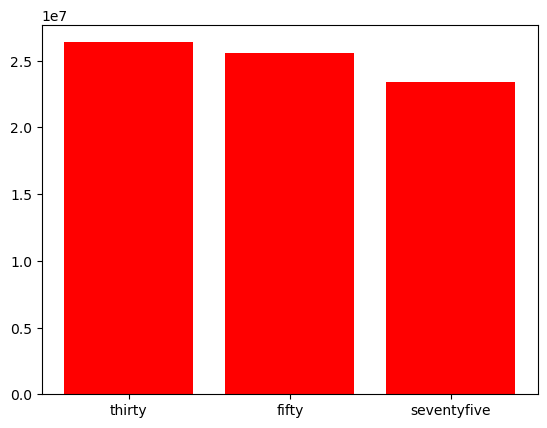

In [28]:

for index, row in g['umd_tree_cover_extent_2000__ha'].iloc[102:103,0:3].iterrows():
    plt.bar(g['umd_tree_cover_extent_2000__ha'].columns[0:3], row, color='r')
    #plt.title(row['country'])
    plt.show()

SORT CARBON NET FLUX FOR EACH THRESHOLD AREA OF EVERY COUNTRY

In [29]:
net_flux_by_country= climate_df.pivot_table(index= 'umd_tree_cover_density_2000__threshold',columns='country',values='gfw_forest_carbon_net_flux__Mg_CO2e_yr-1',aggfunc='sum',fill_value=0)
n=net_flux_by_country.reset_index()
n

country,umd_tree_cover_density_2000__threshold,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,"Virgin Islands, U.S.",Western Sahara,Yemen,Zambia,Zimbabwe
0,30,-415395,-974,-4396125,-1617845,-246558,-110000000,-7889,-81286,-110000000,...,-981476,-4769710,-9,-120000000,-7259476,-38664,0,-27589,-17000000,-1073337
1,50,-295602,-626,-3625290,-906622,-219134,-60000000,-5326,-73626,-65000000,...,-439591,-4667449,-7,-100000000,-1323377,-34319,0,-27404,-1211280,1688290
2,75,-162653,-347,-2439022,-393214,-172490,-7293364,-2243,-61399,-29000000,...,-197648,-4362159,-4,-86000000,3144321,-27561,0,-27387,-2187924,725260


COMPARE CARBON NET FLUX FOR ANY COUNTRIES

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


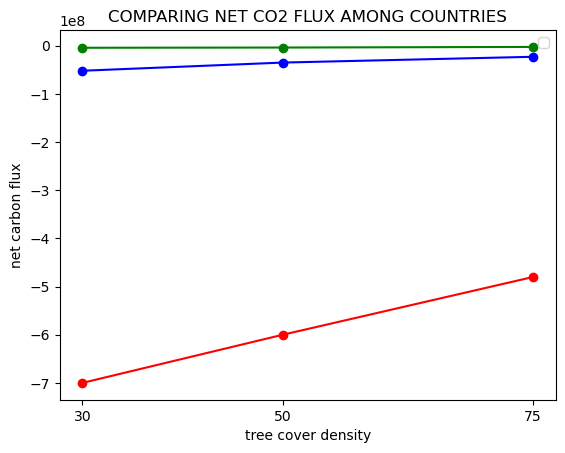

In [30]:
plt.plot(n.umd_tree_cover_density_2000__threshold, n['Nigeria'], color='b', marker='o')
plt.plot(n.umd_tree_cover_density_2000__threshold, n['United States'], color='r',marker='o')
plt.plot(n.umd_tree_cover_density_2000__threshold, n['Iran'], color='g',marker='o')
plt.xlabel('tree cover density')
plt.ylabel('net carbon flux')
plt.title('COMPARING NET CO2 FLUX AMONG COUNTRIES')
plt.xticks([30,50,75])
plt.legend()
plt.show()


CHECK CARBON EMISSIONS PER YEAR FOR EACH THRESHOLD AREA

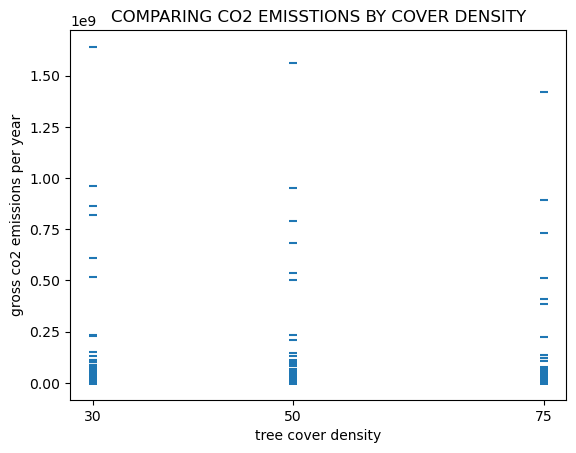

In [31]:
plt.scatter(climate_df['umd_tree_cover_density_2000__threshold'], climate_df['gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1'],marker='_')
plt.xticks([30,50,75])
plt.yticks()
plt.xlabel('tree cover density')
plt.ylabel('gross co2 emissions per year')
plt.title('COMPARING CO2 EMISSTIONS BY COVER DENSITY')
plt.show()

AREAS WITH HIGHEST CARBON EMISSIONS PER YEAR

In [32]:
climate_df.nlargest(10, 'gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1').reset_index().drop('index', axis = 1)

,country,umd_tree_cover_density_2000__threshold,umd_tree_cover_extent_2000__ha,gfw_aboveground_carbon_stocks_2000__Mg_C,avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1,gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1,gfw_forest_carbon_gross_removals__Mg_CO2_yr-1,gfw_forest_carbon_net_flux__Mg_CO2e_yr-1,gfw_forest_carbon_gross_emissions_2001__Mg_CO2e,gfw_forest_carbon_gross_emissions_2002__Mg_CO2e,...,gfw_forest_carbon_gross_emissions_2014__Mg_CO2e,gfw_forest_carbon_gross_emissions_2015__Mg_CO2e,gfw_forest_carbon_gross_emissions_2016__Mg_CO2e,gfw_forest_carbon_gross_emissions_2017__Mg_CO2e,gfw_forest_carbon_gross_emissions_2018__Mg_CO2e,gfw_forest_carbon_gross_emissions_2019__Mg_CO2e,gfw_forest_carbon_gross_emissions_2020__Mg_CO2e,gfw_forest_carbon_gross_emissions_2021__Mg_CO2e,gfw_forest_carbon_gross_emissions_2022__Mg_CO2e,total_carbon_emissions
0,Brazil,30,519000000,55600000000,107,1640000000,1790000000,-150000000,1180000000,1610000000,...,1470000000,1320000000,3270000000,2660000000,1850000000,1610000000,1900000000,2010000000,2230000000,36151000000
1,Brazil,50,476000000,54300000000,114,1560000000,1550000000,8123859,1150000000,1570000000,...,1360000000,1220000000,3120000000,2530000000,1750000000,1500000000,1780000000,1890000000,2090000000,34304000000
2,Brazil,75,429000000,52400000000,122,1420000000,1290000000,126000000,1060000000,1470000000,...,1190000000,1070000000,2880000000,2290000000,1570000000,1340000000,1580000000,1720000000,1900000000,31215000000
3,Indonesia,30,161000000,20300000000,126,961000000,614000000,347000000,492000000,627000000,...,1370000000,1250000000,1780000000,822000000,757000000,733000000,591000000,510000000,543000000,21143000000
4,Indonesia,50,155000000,20000000000,129,950000000,582000000,368000000,490000000,624000000,...,1350000000,1230000000,1750000000,801000000,738000000,711000000,577000000,499000000,531000000,20911000000
5,Indonesia,75,141000000,19100000000,136,894000000,497000000,397000000,477000000,602000000,...,1250000000,1120000000,1590000000,713000000,657000000,625000000,515000000,452000000,479000000,19664000000
6,Canada,30,418000000,13200000000,32,863000000,1650000000,-780000000,419000000,841000000,...,1070000000,1200000000,873000000,1090000000,880000000,938000000,408000000,1080000000,960000000,18981000000
7,United States,30,279000000,17200000000,62,820000000,1520000000,-700000000,624000000,670000000,...,790000000,787000000,962000000,1050000000,961000000,912000000,956000000,997000000,908000000,18039000000
8,United States,50,245000000,16300000000,66,790000000,1400000000,-600000000,611000000,645000000,...,758000000,746000000,923000000,996000000,919000000,859000000,913000000,953000000,859000000,17389000000
9,United States,75,198000000,14600000000,74,732000000,1210000000,-480000000,575000000,599000000,...,705000000,670000000,853000000,924000000,848000000,765000000,838000000,876000000,778000000,16099000000


In [33]:
ll =climate_df.nlargest(155, 'gfw_forest_carbon_gross_emissions_2022__Mg_CO2e').reset_index().drop('index', axis = 1)
ll= ll['country'].unique()
ll

array(['Brazil', 'Canada', 'United States',
       'Democratic Republic of the Congo', 'Russia', 'Indonesia', 'China',
       'Bolivia', 'Laos', 'Colombia', 'Peru', 'Myanmar', 'Vietnam',
       'Madagascar', 'Malaysia', 'Papua New Guinea', "CÃ´te d'Ivoire",
       'Angola', 'Sweden', 'Liberia', 'Cameroon', 'Mozambique', 'Mexico',
       'Argentina', 'Ghana', 'Thailand', 'Nigeria', 'Zambia', 'Paraguay',
       'India', 'Guinea', 'Tanzania', 'Sierra Leone', 'Cambodia',
       'Finland', 'Uruguay', 'Philippines', 'Australia', 'Germany',
       'New Zealand', 'Spain', 'Chile', 'Ecuador', 'Republic of Congo',
       'Uganda', 'Poland', 'South Africa', 'France', 'Honduras',
       'Venezuela', 'Japan', 'Nicaragua', 'Belarus',
       'Central African Republic', 'Guatemala', 'Latvia', 'Ukraine'],
      dtype=object)

AREAS WITH LOWEST CARBON EMISSIONS PER YEAR

In [34]:
climate_df.nsmallest(10, 'gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1').reset_index().drop('index', axis = 1)

,country,umd_tree_cover_density_2000__threshold,umd_tree_cover_extent_2000__ha,gfw_aboveground_carbon_stocks_2000__Mg_C,avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1,gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1,gfw_forest_carbon_gross_removals__Mg_CO2_yr-1,gfw_forest_carbon_net_flux__Mg_CO2e_yr-1,gfw_forest_carbon_gross_emissions_2001__Mg_CO2e,gfw_forest_carbon_gross_emissions_2002__Mg_CO2e,...,gfw_forest_carbon_gross_emissions_2014__Mg_CO2e,gfw_forest_carbon_gross_emissions_2015__Mg_CO2e,gfw_forest_carbon_gross_emissions_2016__Mg_CO2e,gfw_forest_carbon_gross_emissions_2017__Mg_CO2e,gfw_forest_carbon_gross_emissions_2018__Mg_CO2e,gfw_forest_carbon_gross_emissions_2019__Mg_CO2e,gfw_forest_carbon_gross_emissions_2020__Mg_CO2e,gfw_forest_carbon_gross_emissions_2021__Mg_CO2e,gfw_forest_carbon_gross_emissions_2022__Mg_CO2e,total_carbon_emissions
0,Bahrain,30,0,0,0,0,-9,9,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bahrain,50,0,0,0,0,-9,9,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bahrain,75,0,0,0,0,-9,9,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Cape Verde,30,7356,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Cape Verde,50,3744,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Cape Verde,75,2433,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Clipperton Island,30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Clipperton Island,50,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Clipperton Island,75,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Djibouti,30,0,5,67,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


CREATE NEW DATAFRAMES FOR EACH THRESHOLD AREA(30,50,75)

In [35]:
thirty_df = climate_df[climate_df['umd_tree_cover_density_2000__threshold']==30].reset_index().drop('index', axis = 1)
fifty_df = climate_df[climate_df['umd_tree_cover_density_2000__threshold']==50].reset_index().drop('index', axis = 1)
seventyfive_df = climate_df[climate_df['umd_tree_cover_density_2000__threshold']==75].reset_index().drop('index', axis = 1)

SECOND DATAFRAME EXCLUDING CARBON EMISSIONS FROM 2001 TO 2022

In [36]:
thirty_df2 = thirty_df.drop([f'gfw_forest_carbon_gross_emissions_{year}__Mg_CO2e' for year in range(2001, 2023)], axis=1)
fifty_df2 = fifty_df.drop([f'gfw_forest_carbon_gross_emissions_{year}__Mg_CO2e' for year in range(2001, 2023)], axis=1)
seventyfive_df2 = seventyfive_df.drop([f'gfw_forest_carbon_gross_emissions_{year}__Mg_CO2e' for year in range(2001, 2023)], axis=1)

MATRIX TO INFER FACTORS INFLUENCING TOTAL CARBON EMISSIONS IN THRESHOLD 30

Text(0.5, 1.0, 'CORRELATION MATRIX FOR TOTAL CARBON EMISSIONS IN 30% AREAS')

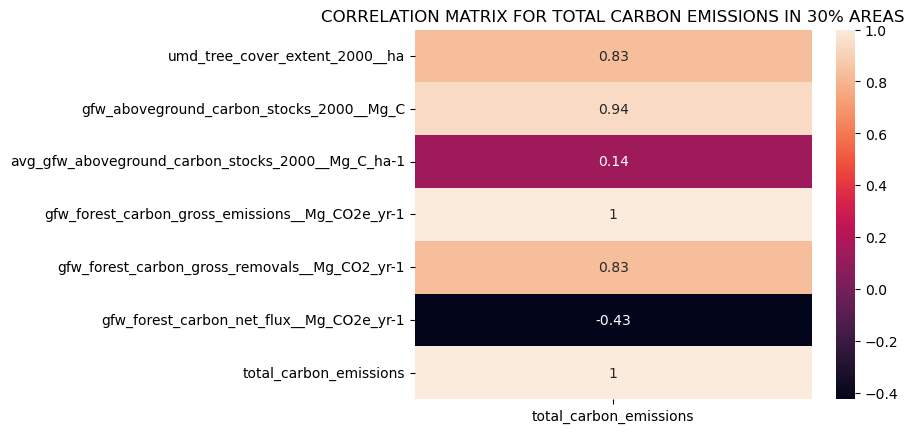

In [37]:
th_corr = thirty_df2.drop(['country', 'umd_tree_cover_density_2000__threshold' ], axis=1).corr()
fi_corr = fifty_df2.drop(['country', 'umd_tree_cover_density_2000__threshold' ] , axis=1).corr()
sf_corr = seventyfive_df2.drop(['country', 'umd_tree_cover_density_2000__threshold' ] , axis=1).corr()
sns.heatmap( th_corr[['total_carbon_emissions']], annot=True)
plt.title('CORRELATION MATRIX FOR TOTAL CARBON EMISSIONS IN 30% AREAS')

MATRIX TO INFER FACTORS INFLUENCING TOTAL CARBON EMISSIONS IN THRESHOLD 50

Text(0.5, 1.0, 'CORRELATION MATRIX FOR TOTAL CARBON EMISSIONS IN 50% AREAS')

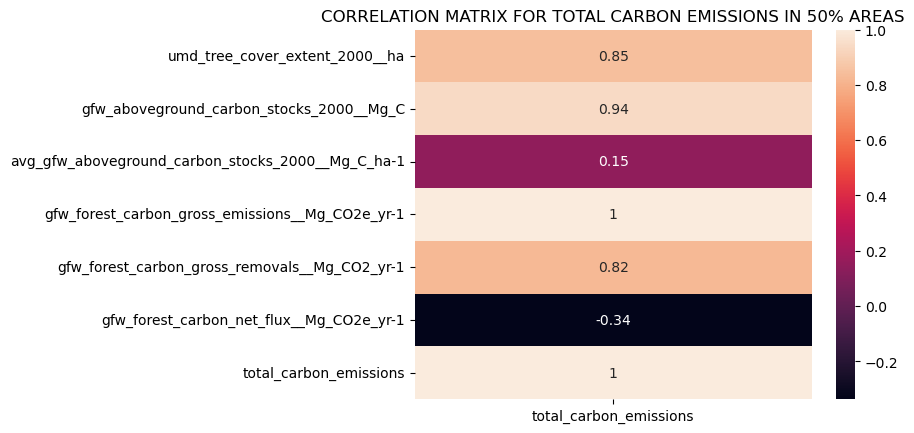

In [38]:
sns.heatmap( fi_corr[['total_carbon_emissions']], annot=True)
plt.title('CORRELATION MATRIX FOR TOTAL CARBON EMISSIONS IN 50% AREAS')

MATRIX TO INFER FACTORS INFLUENCING TOTAL CARBON EMISSIONS IN THRESHOLD 75

Text(0.5, 1.0, 'CORRELATION MATRIX FOR TOTAL CARBON EMISSIONS IN 75% AREAS')

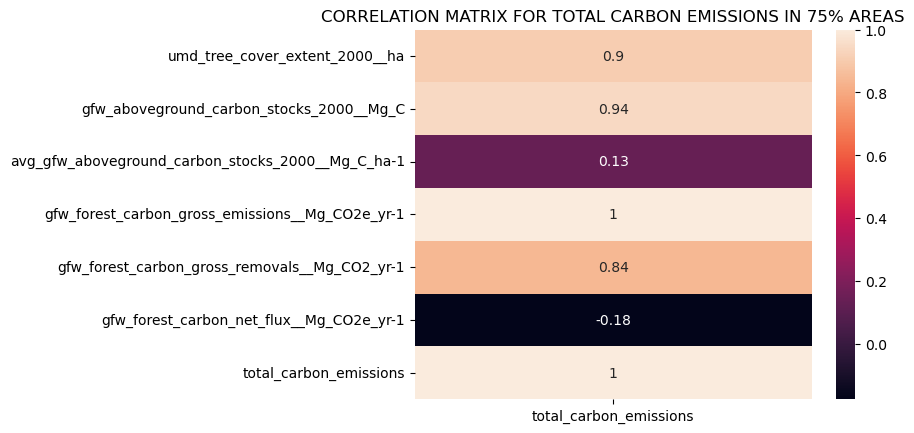

In [39]:
sns.heatmap( sf_corr[['total_carbon_emissions']], annot=True)
plt.title('CORRELATION MATRIX FOR TOTAL CARBON EMISSIONS IN 75% AREAS')



EXTRACTING YEARS FROM ANNUAL CARBOM EMISSION COLUMNS

In [40]:
def extract_years(columns):
    years = []
    for col in columns:
        match = re.search(r'\d{4}', col)
        if match:
            years.append(int(match.group()))
    return years

# Extract years
years = extract_years(climate_df.columns[8:30])
years

[2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [41]:
x=years

LOCATE COUNTRY IN ANY THRESHOLD AREA

In [42]:
fifty_df[fifty_df['country'].str.contains('United')]
seventyfive_df[seventyfive_df['country'].str.contains('United')]
thirty_df[thirty_df['country'].str.contains('United')]


,country,umd_tree_cover_density_2000__threshold,umd_tree_cover_extent_2000__ha,gfw_aboveground_carbon_stocks_2000__Mg_C,avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1,gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1,gfw_forest_carbon_gross_removals__Mg_CO2_yr-1,gfw_forest_carbon_net_flux__Mg_CO2e_yr-1,gfw_forest_carbon_gross_emissions_2001__Mg_CO2e,gfw_forest_carbon_gross_emissions_2002__Mg_CO2e,...,gfw_forest_carbon_gross_emissions_2014__Mg_CO2e,gfw_forest_carbon_gross_emissions_2015__Mg_CO2e,gfw_forest_carbon_gross_emissions_2016__Mg_CO2e,gfw_forest_carbon_gross_emissions_2017__Mg_CO2e,gfw_forest_carbon_gross_emissions_2018__Mg_CO2e,gfw_forest_carbon_gross_emissions_2019__Mg_CO2e,gfw_forest_carbon_gross_emissions_2020__Mg_CO2e,gfw_forest_carbon_gross_emissions_2021__Mg_CO2e,gfw_forest_carbon_gross_emissions_2022__Mg_CO2e,total_carbon_emissions
219,United Arab Emirates,30,0,0,0,0,20346,-20346,0,0,...,0,0,0,0,0,0,0,0,0,8
220,United Kingdom,30,3695599,256000000,69,10584057,24141659,-14000000,8315638,7427520,...,13264471,10625729,12882031,10566643,12102313,13285110,10634302,12799925,16516930,232849256
221,United States,30,279000000,17200000000,62,820000000,1520000000,-700000000,624000000,670000000,...,790000000,787000000,962000000,1050000000,961000000,912000000,956000000,997000000,908000000,18039000000
222,United States Minor Outlying Islands,30,146,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


EXTRACT YEARLY CARBON EMISSION VALUES FROM THRESHOLD 30 DATAFRAME

In [43]:

thy = thirty_df.iloc[219:223, 0:30].drop(thirty_df.columns[1:8] , axis=1)

In [44]:
pd.set_option('display.max_columns',None)
thy

,country,gfw_forest_carbon_gross_emissions_2001__Mg_CO2e,gfw_forest_carbon_gross_emissions_2002__Mg_CO2e,gfw_forest_carbon_gross_emissions_2003__Mg_CO2e,gfw_forest_carbon_gross_emissions_2004__Mg_CO2e,gfw_forest_carbon_gross_emissions_2005__Mg_CO2e,gfw_forest_carbon_gross_emissions_2006__Mg_CO2e,gfw_forest_carbon_gross_emissions_2007__Mg_CO2e,gfw_forest_carbon_gross_emissions_2008__Mg_CO2e,gfw_forest_carbon_gross_emissions_2009__Mg_CO2e,gfw_forest_carbon_gross_emissions_2010__Mg_CO2e,gfw_forest_carbon_gross_emissions_2011__Mg_CO2e,gfw_forest_carbon_gross_emissions_2012__Mg_CO2e,gfw_forest_carbon_gross_emissions_2013__Mg_CO2e,gfw_forest_carbon_gross_emissions_2014__Mg_CO2e,gfw_forest_carbon_gross_emissions_2015__Mg_CO2e,gfw_forest_carbon_gross_emissions_2016__Mg_CO2e,gfw_forest_carbon_gross_emissions_2017__Mg_CO2e,gfw_forest_carbon_gross_emissions_2018__Mg_CO2e,gfw_forest_carbon_gross_emissions_2019__Mg_CO2e,gfw_forest_carbon_gross_emissions_2020__Mg_CO2e,gfw_forest_carbon_gross_emissions_2021__Mg_CO2e,gfw_forest_carbon_gross_emissions_2022__Mg_CO2e
219,United Arab Emirates,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0
220,United Kingdom,8315638,7427520,599958,9553036,3778038,8288102,12328557,5268129,14744769,12277479,10482976,14988967,12118633,13264471,10625729,12882031,10566643,12102313,13285110,10634302,12799925,16516930
221,United States,624000000,670000000,551000000,855000000,824000000,859000000,868000000,877000000,639000000,760000000,690000000,805000000,694000000,790000000,787000000,962000000,1050000000,961000000,912000000,956000000,997000000,908000000
222,United States Minor Outlying Islands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


GRAPH OF GROSS CARBON EMISSIONS FROM 2001 TO 2022 FOR PREFERRED COUNTRIES

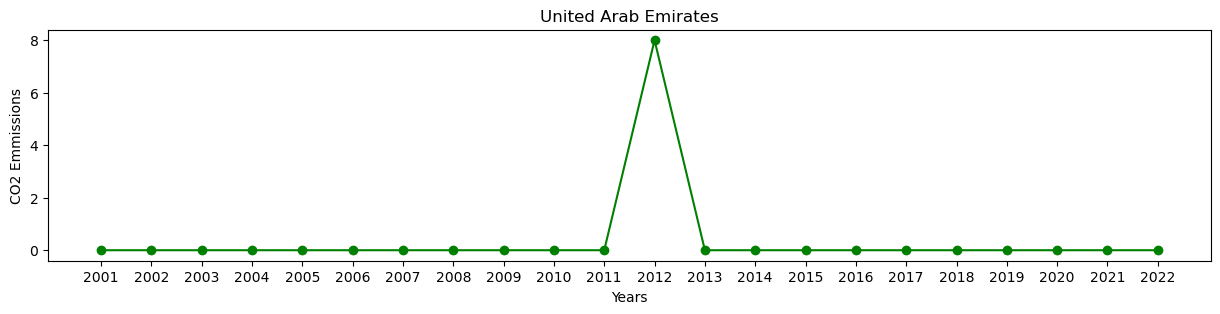

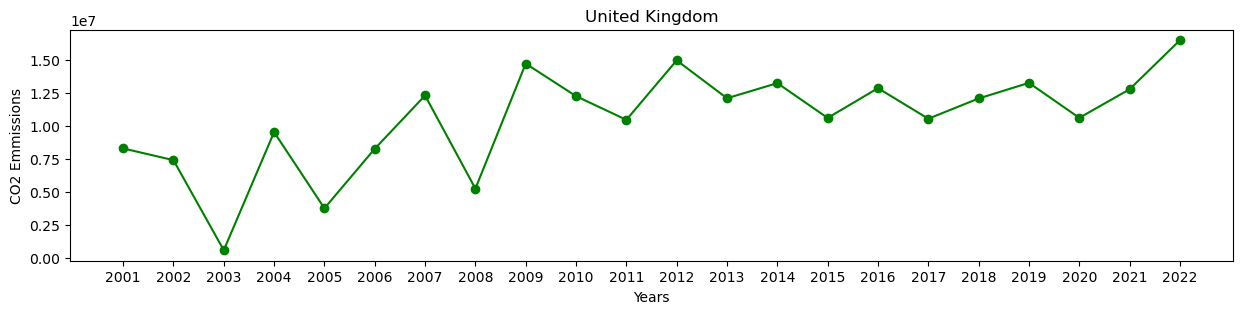

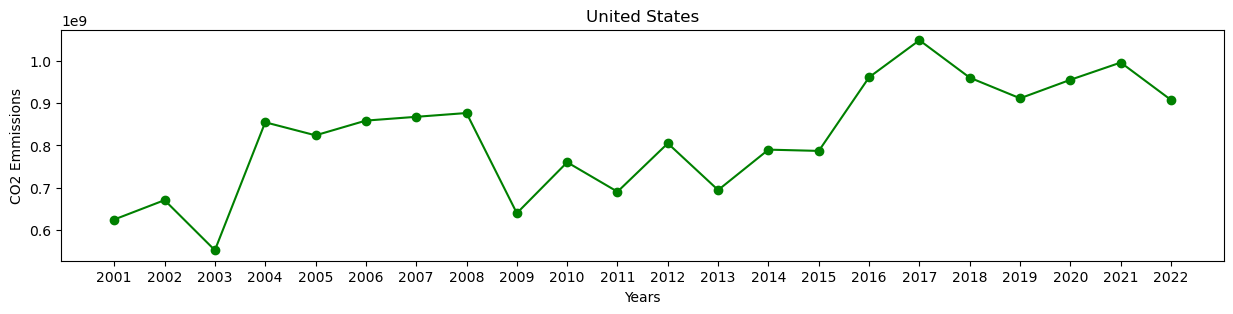

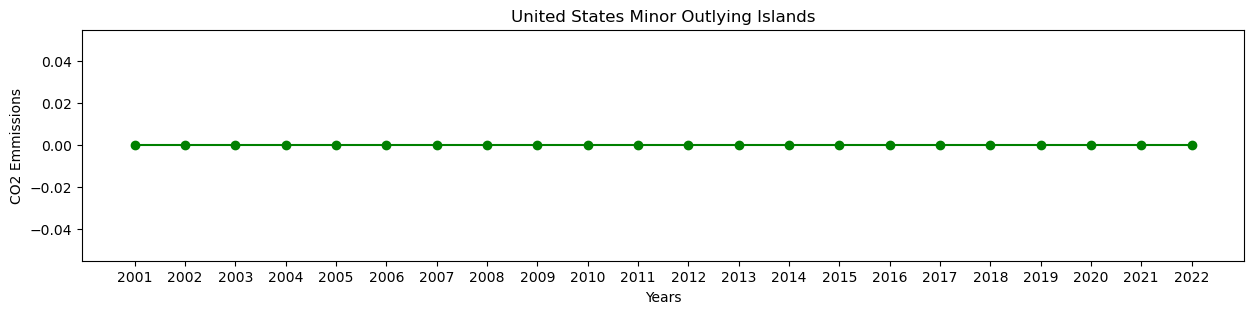

In [45]:

for index, row in thy.iterrows():   
    plt.figure(figsize=(15,3))
    r = row.drop('country')
    plt.plot(x, r, color= "green", marker= 'o')
    plt.xlabel('Years')
    plt.title(row['country'])
    plt.ylabel('CO2 Emmissions')
    plt.xticks(x)
    plt.plot()
    plt.show()


TOTAL OF CARBON METRICS FOR THE WORLD

In [46]:
f=climate_df.iloc[0:,1:].sum()
f

umd_tree_cover_density_2000__threshold                      36270
umd_tree_cover_extent_2000__ha                         9652733284
gfw_aboveground_carbon_stocks_2000__Mg_C             794299719213
avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1           49770
gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1       23531341535
gfw_forest_carbon_gross_removals__Mg_CO2_yr-1         40679725389
gfw_forest_carbon_net_flux__Mg_CO2e_yr-1             -17210205168
gfw_forest_carbon_gross_emissions_2001__Mg_CO2e       13412555373
gfw_forest_carbon_gross_emissions_2002__Mg_CO2e       16618945764
gfw_forest_carbon_gross_emissions_2003__Mg_CO2e       13800170760
gfw_forest_carbon_gross_emissions_2004__Mg_CO2e       20524635574
gfw_forest_carbon_gross_emissions_2005__Mg_CO2e       20458204084
gfw_forest_carbon_gross_emissions_2006__Mg_CO2e       19464570797
gfw_forest_carbon_gross_emissions_2007__Mg_CO2e       20916890535
gfw_forest_carbon_gross_emissions_2008__Mg_CO2e       20469136654
gfw_forest

EXTRACTING WORLD FOREST CARBON EMISSIONS FROM 2001 TO 2022

In [47]:
f[7:29].values

array([13412555373, 16618945764, 13800170760, 20524635574, 20458204084,
       19464570797, 20916890535, 20469136654, 20613899220, 22122093081,
       20801045502, 26996062739, 21009308600, 26392084158, 23441458111,
       36978805587, 34166307740, 28455761766, 27203069143, 28148776737,
       28104980253, 27593902086], dtype=int64)

GRAPH OF WORLD FOREST CARBON EMMISIONS FROM 2001 TO 2022

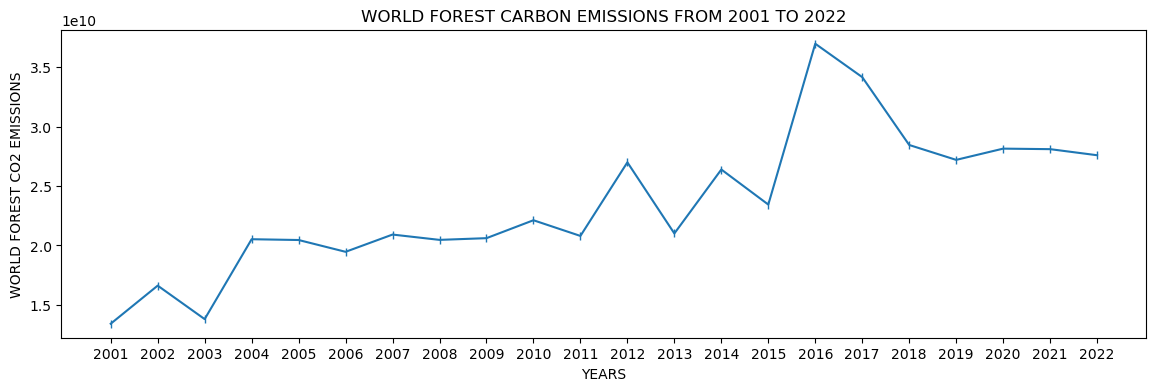

In [48]:
plt.figure(figsize=(14,4))
plt.plot(x,f[7:29], marker='|')
plt.title('WORLD FOREST CARBON EMISSIONS FROM 2001 TO 2022')
plt.xlabel('YEARS')
plt.ylabel('WORLD FOREST CO2 EMISSIONS')
plt.xticks(x)
plt.show()

In [49]:
fig = px.choropleth(climate_df, locations='country',locationmode='country names',color='total_carbon_emissions',
hover_name='country',title='emission by country',color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
    width=1000,
    height=700,
    geo=dict(
        showframe=False,
        showcoastlines=False,
    )
)
fig.show()

In [53]:
fig = px.choropleth(climate_df, locations='country',locationmode='country names',color='gfw_forest_carbon_net_flux__Mg_CO2e_yr-1',
hover_name='country',title='FOREST CARBON NET FLUX BY COUNTRY',color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
    width=1000,
    height=700,
    geo=dict(
        showframe=False,
        showcoastlines=False,
    )
)
fig.show()

In [51]:
fig = px.choropleth(climate_df, locations='country',locationmode='country names',color='umd_tree_cover_extent_2000__ha',
hover_name='country',title='TREE COVER EXTENT BY COUNTRY',color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
    width=1000,
    height=700,
    geo=dict(
        showframe=False,
        showcoastlines=False,
    )
)
fig.show()

In [52]:
fig = px.choropleth(climate_df, locations='country',locationmode='country names',color='gfw_aboveground_carbon_stocks_2000__Mg_C',
hover_name='country',title='FOREST CARBON ABOVEGROUNG CARBON STOCKS BY COUNTRY',color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
    width=1000,
    height=700,
    geo=dict(
        showframe=False,
        showcoastlines=False,
    )
)
fig.show()